- The signal takes some time to train as you need to build vocabulary returns. We can't train the model on words much before the election since there wasn't a causal relation between Trump's tweets and the market before that time. Looking at the signal, it seems to stabilize by February 2017.
- We also need to remove tweets with exactly zero return, which are most likely tweets with less than 10 words.

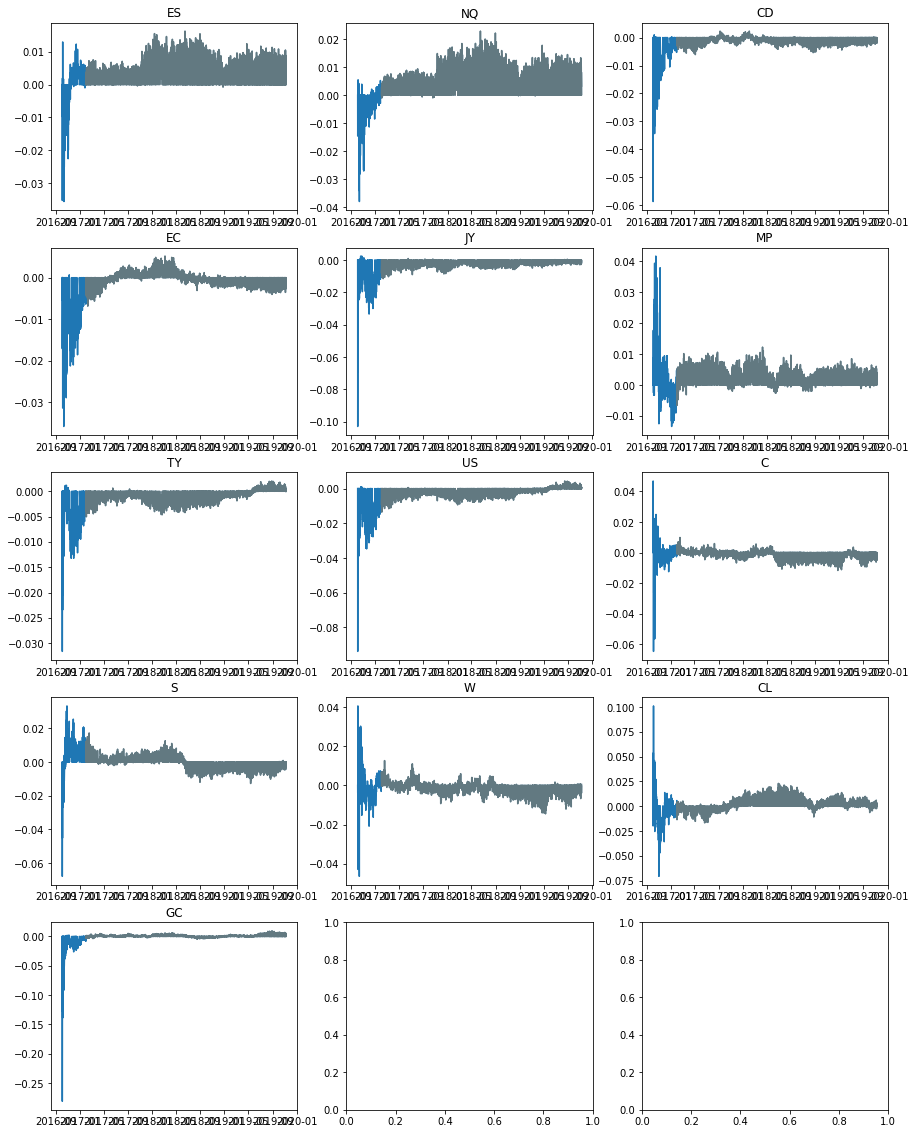

In [71]:
fig, ax = plt.subplots(5,3, figsize=(15,20))
ax = ax.ravel()
for i, inst in enumerate(instrument_list):
    ax[i].plot(daily_tweets['{}_single_ret'.format(inst)])
    ax[i].plot(daily_tweets[daily_tweets.after4_date >= 
                            pd.to_datetime('2017-02-01')]['{}_single_ret'.format(inst)], alpha =0.3)
    ax[i].set_title(inst)

In [72]:
final_daily_tweets = daily_tweets[daily_tweets.after4_date >= pd.to_datetime('2017-02-01')]

Calculating the 3 features:

- **daily_tweet_score**: The average of the scores for every word tweeted in a day.
- **max_tweet_score**: The score of the tweet with the highest score in a day.
- **min_tweet_score**: The score of the tweet with the highest score in a day.

In [16]:
tweet_returns_features = pd.DataFrame()
for inst in instrument_list:
    final_nozero = final_daily_tweets[final_daily_tweets[inst+'_single_ret']!=0]
    tweet_returns_features[inst + '_min_tweet'] = final_nozero.groupby('after4_date').min()[inst+'_single_ret']
    tweet_returns_features[inst + '_max_tweet'] = final_nozero.groupby('after4_date').max()[inst+'_single_ret']
    tweet_returns_features[inst + '_daily_tweet'] = daily_df[inst + '_daily_tweet_score']

In [73]:
tweet_returns_features.head()

,ES_min_tweet,ES_max_tweet,ES_daily_tweet,NQ_min_tweet,NQ_max_tweet,NQ_daily_tweet,CD_min_tweet,CD_max_tweet,CD_daily_tweet,EC_min_tweet,...,S_daily_tweet,W_min_tweet,W_max_tweet,W_daily_tweet,CL_min_tweet,CL_max_tweet,CL_daily_tweet,GC_min_tweet,GC_max_tweet,GC_daily_tweet
date,,,,,,,,,,,,,,,,,,,,,
2017-02-01,0.001327,0.003084,0.000105,0.000571,0.002905,0.000071,-0.002969,-0.002929,-0.000105,-0.003917,...,0.000400,0.003273,0.006890,0.000192,-0.013598,-0.001480,-0.000215,-0.002968,-0.001088,-0.000081
2017-02-02,-0.000004,0.003867,0.000082,-0.001018,0.004204,0.000053,-0.002580,-0.000271,-0.000073,-0.004450,...,0.000353,0.000942,0.005608,0.000144,-0.005371,0.004203,-0.000064,-0.003318,0.001656,-0.000050
2017-02-03,0.001319,0.005195,0.000133,0.000611,0.002715,0.000086,-0.002934,-0.001324,-0.000093,-0.003618,...,0.000261,-0.000125,0.003374,0.000048,-0.007231,0.003012,-0.000076,-0.002461,-0.000722,-0.000068
2017-02-06,0.001328,0.003935,0.000133,-0.000043,0.002914,0.000077,-0.002640,-0.001264,-0.000093,-0.003573,...,0.000301,-0.000476,0.001679,0.000018,-0.004039,0.004057,-0.000061,-0.002233,0.000442,-0.000043
2017-02-07,0.001821,0.004572,0.000141,0.001859,0.004924,0.000129,-0.004049,-0.001546,-0.000128,-0.004124,...,0.000428,0.001638,0.004803,0.000130,-0.008617,-0.002315,-0.000212,-0.000658,0.001226,-0.000010


In [74]:
tweet_returns_features.index.name = 'date'
tweet_returns_features.to_csv('../data/features/tweet_returns.csv')

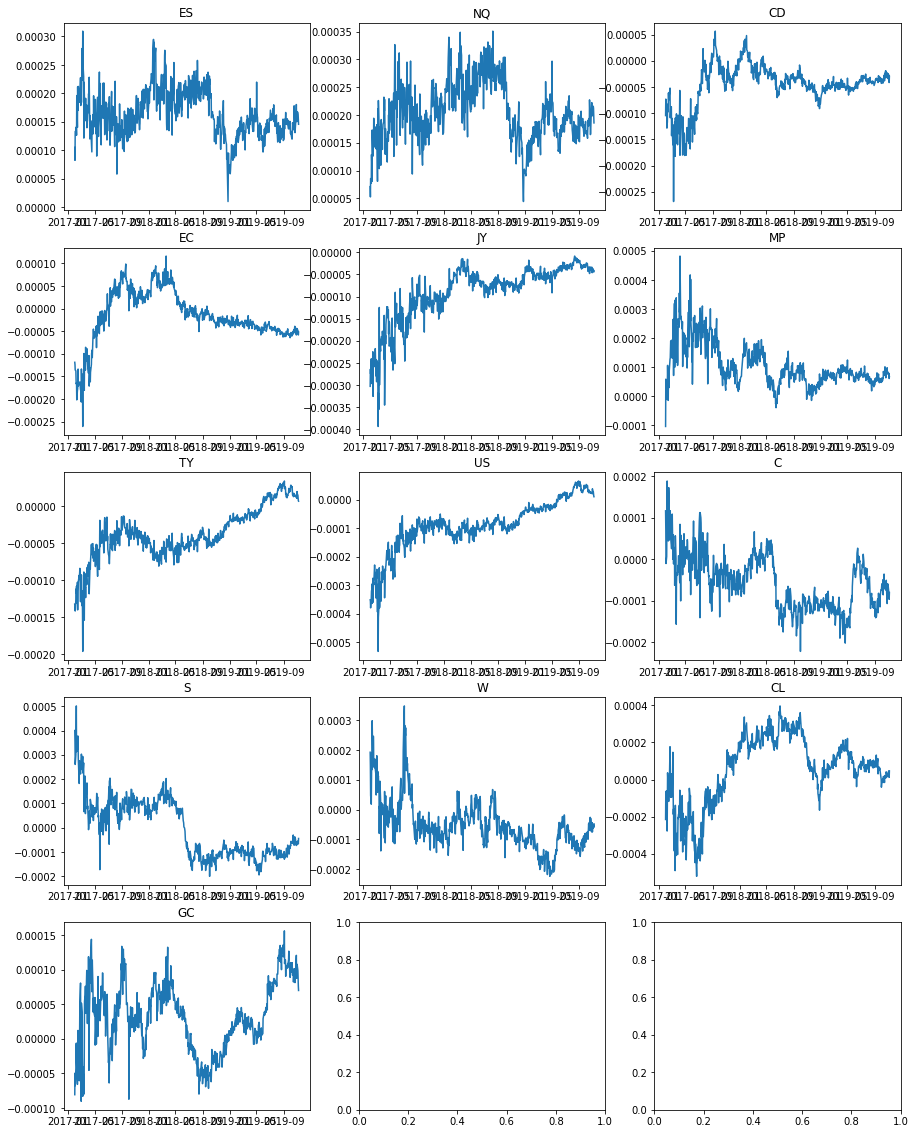

In [75]:
fig, ax = plt.subplots(5,3, figsize=(15,20))
ax = ax.ravel()
for i, inst in enumerate(instrument_list):
    ax[i].plot(tweet_returns_features['{}_daily_tweet'.format(inst)])
    ax[i].set_title(inst)

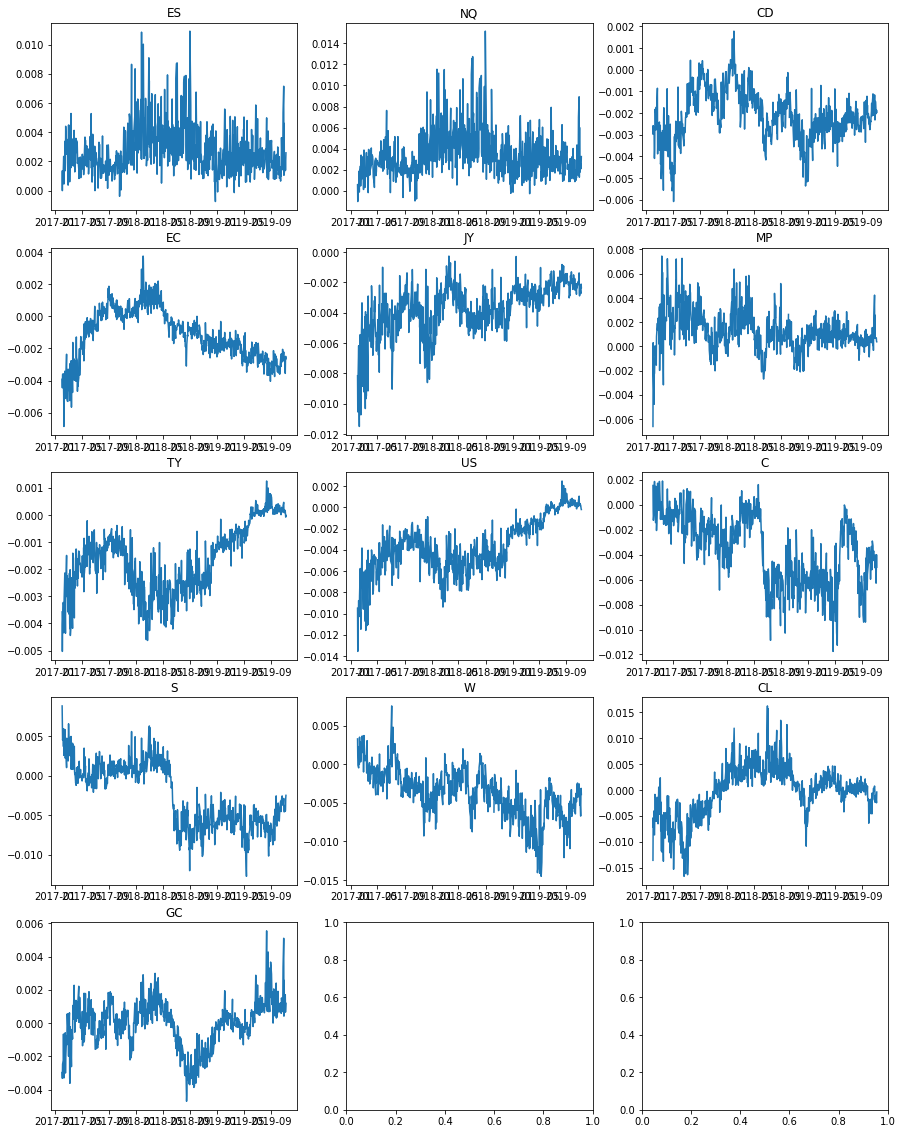

In [76]:
fig, ax = plt.subplots(5,3, figsize=(15,20))
ax = ax.ravel()
for i, inst in enumerate(instrument_list):
    ax[i].plot(tweet_returns_features['{}_min_tweet'.format(inst)])
    ax[i].set_title(inst)

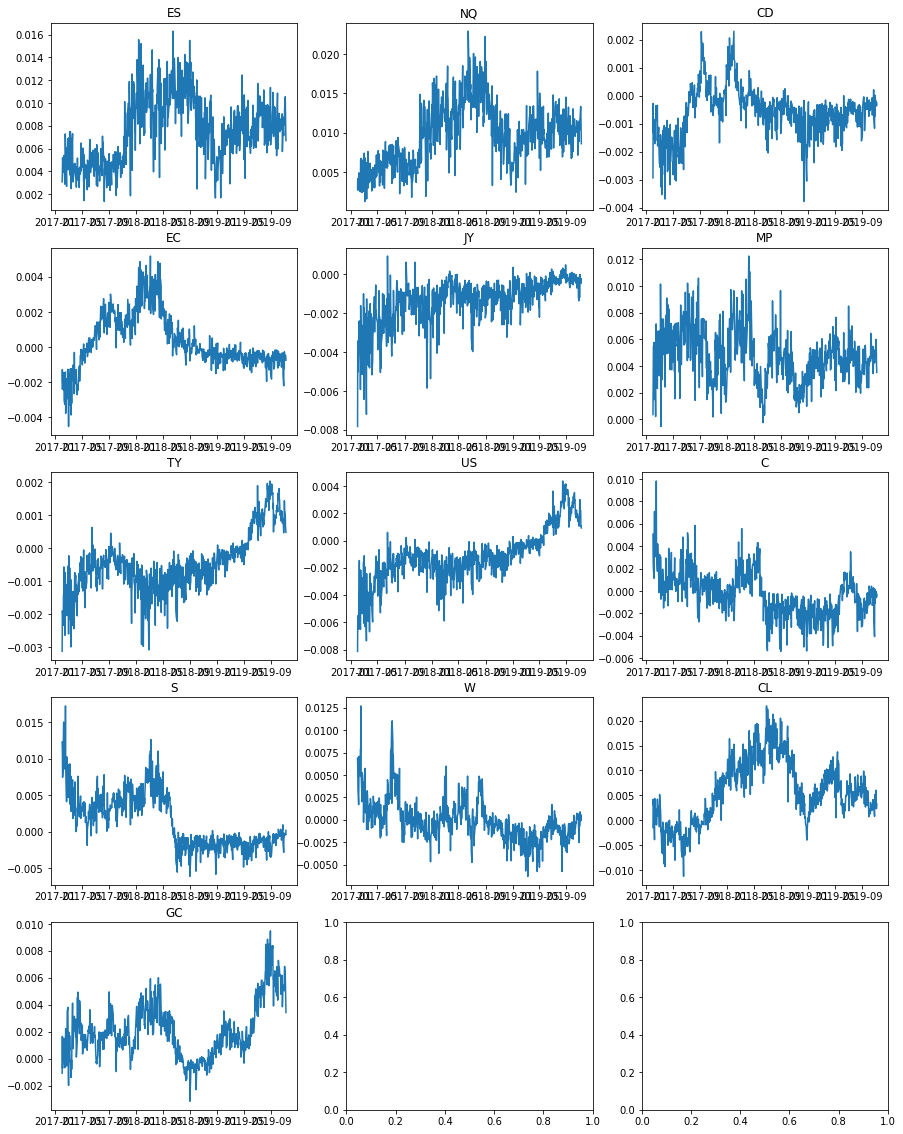

In [78]:
fig, ax = plt.subplots(5,3, figsize=(15,20))
ax = ax.ravel()
for i, inst in enumerate(instrument_list):
    ax[i].plot(tweet_returns_features['{}_max_tweet'.format(inst)])
    ax[i].set_title(inst)